## Module 1 Final Project Submission


* Student name: Marisa Morris
* Student pace: self paced
* Scheduled project review date/time: 10/7/2019, 6PM EST
* Instructor name: Eli Thomas
* Blog post URL:


# King County House Sales Exploration

We have been given a set of data that can help homeowners of King County evaluate the price of their home. The homeowners may be looking to sell their home, therefore they would like to price it competitively with other houses on the market, or they may want to add value to their home, which can be done by renovations.

## Process

### Scrub the Data
   It is important that we are working with clean data. To clean our data we will do the following steps:
       - Identify and address null, missing, and 'placeholder' values
       - Determine if there are any extreme outliers in our data and possibly remove them
       - Format datatypes
       - Convert non-continous data to categorical if necessary
### Explore the Data
   Once our data is a cleaned up we can start exploring! We can check to see what variables correlate with price. To do    this, we can create visualizations to hopefully find a linear relationship. We will also check for multicollinearity, if there is some present, if could effect the accuracy of our model.
   
### Modeling the Data
   After exploring the data, we will construct a model that will evaluate the housing prices. Then we will use a method called train-test-split to validate the accuracy of our model. 
   
### Interpreting the Results
   One we have completed modeling, we should be able to determine what variables play the strongest role in determing the price of houses in King County.


# Scrubbing the Data

Let's start by loading the data, along with some helpful libraries. Then we will preview the data

#### import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [131]:
import pandas as pd
kc = pd.read_csv('kc_house_data.csv')# Use pandas to load the csv file
kc.head() #Examine first five rows

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [132]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [133]:
kc.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [134]:
# Something seems to be going on with sqft_basement
for col in kc.columns:
    print (col, '\n',kc[col].value_counts(normalize=True).head(), '\n\n')
# We can see below a portion of the values are listed as ?

id 
 795000620     0.000139
1825069031    0.000093
2019200220    0.000093
7129304540    0.000093
1781500435    0.000093
Name: id, dtype: float64 


date 
 6/23/2014    0.006575
6/25/2014    0.006066
6/26/2014    0.006066
7/8/2014     0.005880
4/27/2015    0.005834
Name: date, dtype: float64 


price 
 350000.0    0.007964
450000.0    0.007964
550000.0    0.007362
500000.0    0.007038
425000.0    0.006945
Name: price, dtype: float64 


bedrooms 
 3    0.454878
4    0.318655
2    0.127796
5    0.074131
6    0.012594
Name: bedrooms, dtype: float64 


bathrooms 
 2.50    0.248970
1.00    0.178312
1.75    0.141131
2.25    0.094782
2.00    0.089364
Name: bathrooms, dtype: float64 


sqft_living 
 1300    0.006390
1400    0.006251
1440    0.006158
1660    0.005973
1010    0.005973
Name: sqft_living, dtype: float64 


sqft_lot 
 5000    0.016576
6000    0.013428
4000    0.011622
7200    0.010187
7500    0.005510
Name: sqft_lot, dtype: float64 


floors 
 1.0    0.494189
2.0    0.381303
1.5    

In [135]:
# Let's convert the ? to 0
import numpy as np
kc.loc[kc['sqft_basement'] == '?', 'sqft_basement'] = 0 # convert ? to 0
kc.sqft_basement = kc.sqft_basement.astype(np.float64) # change from string

kc.date = pd.to_datetime(kc.date) # convert date to datetime

kc.info() # date is now listed as datetime and sqft_basement is now listed as float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(11)
memory usage: 3.5

In [136]:
kc.isna().any() #check to see if any column has nulll values

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [137]:
kc.isna().sum() #find out how many null values in each column

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [138]:
#return the unique values in kc, 'waterfront', 'yr_renovated', and 'view' columns to ensure that there are no values 
#in there that we don't understand or can't account for
for col in ['waterfront', 'yr_renovated', 'view']:
    print('Values for {}:\n{}\n\n'.format(col, kc[col].unique()))

Values for waterfront:
[nan  0.  1.]


Values for yr_renovated:
[   0. 1991.   nan 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984.
 1954. 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999.
 1998. 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971.
 1979. 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963.
 1951. 1962. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975.
 1964. 1973. 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.]


Values for view:
[ 0. nan  3.  4.  2.  1.]




In [139]:
kc.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [140]:
kc.waterfront.fillna(0, inplace=True) 
# Replace null values as 0. Since the majority of the values are 0 this shouldn't compromise our data
# And I would think that if a property had a waterfront view, it would be a priority to be listed as such

In [141]:
kc.yr_renovated.value_counts(normalize=True) #most homes do not list the year renovated, if renovated

0.0       0.958096
2014.0    0.004112
2003.0    0.001746
2013.0    0.001746
2007.0    0.001690
2000.0    0.001633
2005.0    0.001633
1990.0    0.001239
2004.0    0.001239
2009.0    0.001183
1989.0    0.001126
2006.0    0.001126
2002.0    0.000957
1991.0    0.000901
1998.0    0.000901
1984.0    0.000901
1999.0    0.000845
2008.0    0.000845
2010.0    0.000845
2001.0    0.000845
1983.0    0.000845
2015.0    0.000789
1985.0    0.000789
1986.0    0.000789
1987.0    0.000789
1994.0    0.000789
1992.0    0.000732
1993.0    0.000676
1997.0    0.000676
1995.0    0.000676
            ...   
1975.0    0.000282
1964.0    0.000282
1969.0    0.000225
1963.0    0.000225
1973.0    0.000225
1981.0    0.000225
1965.0    0.000225
1978.0    0.000169
1960.0    0.000169
1958.0    0.000169
1956.0    0.000169
1955.0    0.000169
1945.0    0.000169
1972.0    0.000169
1967.0    0.000113
1957.0    0.000113
1940.0    0.000113
1974.0    0.000113
1962.0    0.000113
1953.0    0.000056
1950.0    0.000056
1934.0    0.

In [142]:
kc.yr_renovated.fillna(0, inplace=True) 
# Replace null values with 0 since most are listed as 0

In [143]:
kc.view.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [144]:
kc.view.fillna(0, inplace=True)
# Replace null values with 0 since most are listed as 0

In [145]:
# A quick check of our work
kc.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [146]:
kc.info() # A quick check of our work

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(11)
memory usage: 3.5

In [147]:
#Check to see if any duplicates exist within the data
duplicates = kc[kc.duplicated()]
print(len(duplicates))
duplicates.head()

0


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


# Exploring the Data
Now we will check for outliers, multicollinearity, categorical variables and distribution of features.

## Check for outliers

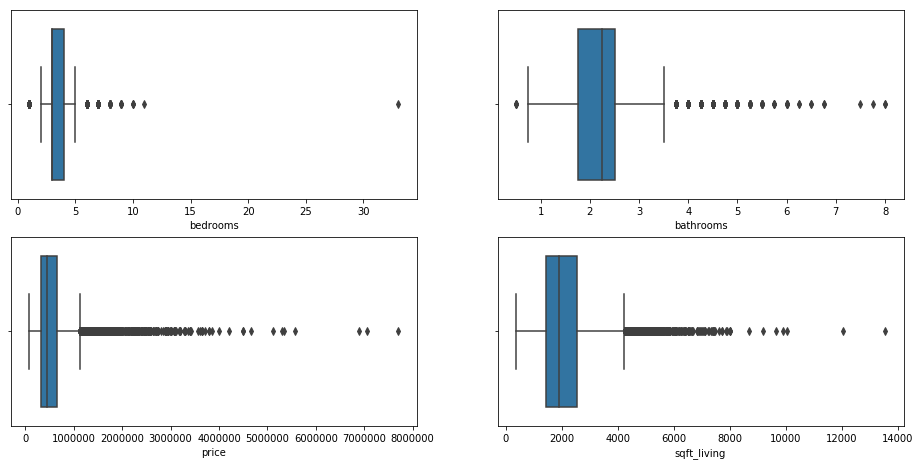

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns 
plt.figure(figsize=(16,16))
plt.subplot(421)
sns.boxplot(x='bedrooms', data=kc)
plt.subplot(422)
sns.boxplot(x='bathrooms', data=kc)
plt.subplot(423)
sns.boxplot(x='price', data=kc)
plt.subplot(424)
sns.boxplot(x='sqft_living', data=kc)

We can see that we have some outliers. Bedrooms has a significant one at 30 bedrooms! Bathrooms also has outliers after a house has 4 bathrooms and price and sqft_living also can be cleaned up as well.

In [149]:
# Let's remove some outliers
kc =kc[kc.bathrooms < 5]  
kc =kc[kc.bedrooms < 6]
kc =kc[kc.price < 2000000]
kc =kc[kc.sqft_living < 5000]

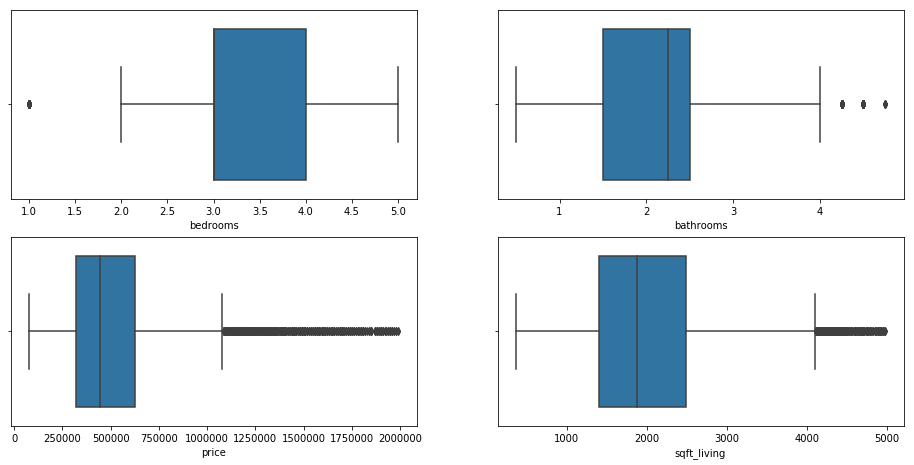

In [150]:
plt.figure(figsize=(16,16))
plt.subplot(421)
sns.boxplot(x='bedrooms', data=kc)
plt.subplot(422)
sns.boxplot(x='bathrooms', data=kc)
plt.subplot(423)
sns.boxplot(x='price', data=kc)
plt.subplot(424)
sns.boxplot(x='sqft_living', data=kc)

Those boxplots look much better!

## Check for Multicollinearity 

In [151]:
# Remove target variable, price. We can also remove the variable id as well.
kc_pred = kc.iloc[:,3:21]
kc_pred.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [152]:
# Correlation matrix that shows if relationship has a value of 0.75 or higher
abs(kc_pred.corr()) > 0.75

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
sqft_lot,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
sqft_above,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False


Text(0.5, 1.0, 'Correlation')

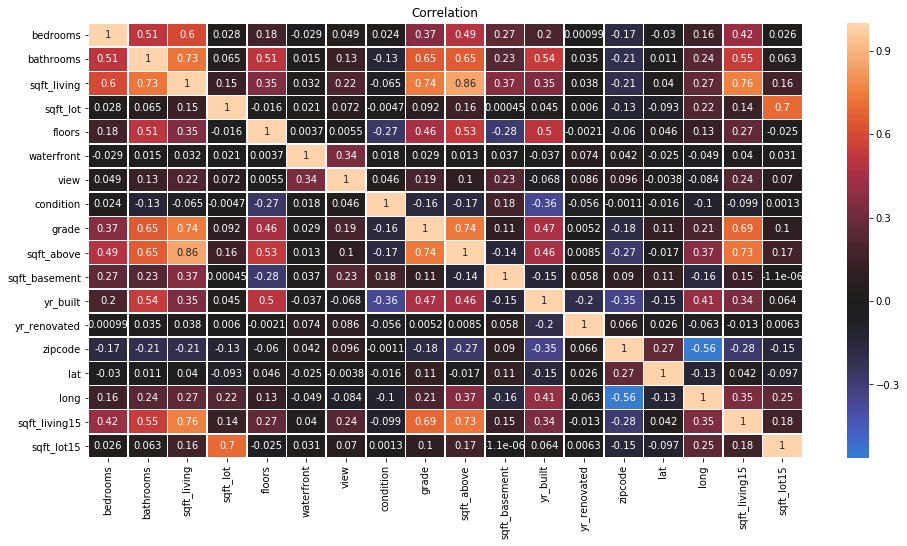

In [153]:
ax = plt.subplots(figsize=(16,8))
sns.heatmap(kc_pred.corr(), annot = True, center = 0, linewidth = .5);
plt.title('Correlation')

The lighter color show us which features have higher correlations. If two variables have a correlation greater than 0.75, it is a sign of multicollinearity. The features sqft_above and sqft_living have a correlation of 0.86. Since both variables are related to the square footage of the house, it makes sense that they have a high correlation. Let's remove sqft_above from our features list.

In [154]:
kc.drop('sqft_above', axis=1, inplace=True) 

## Feature Creation

An important feature when selling a home is location. The same exact house might be priced higher in one area (zipcode) than another. There are many factors that influence changes in price based on location, such as schools and crime rates. To help compare homes, we can calculate the price per square foot. 

In [155]:
kc['price_per_sqft'] = kc['price']/kc['sqft_living'] # price per sqft

In [156]:
kc.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft
count,2.095600e+04,2.095600e+04,20956.000000,20956.000000,20956.000000,2.095600e+04,20956.000000,20956.000000,20956.000000,20956.000000,20956.000000,20956.000000,20956.000000,20956.000000,20956.000000,20956.000000,20956.000000,20956.000000,20956.000000,20956.000000
mean,4.592044e+09,5.112794e+05,3.313275,2.073702,2014.810603,1.462113e+04,1.486209,0.004629,0.207578,3.409382,7.606413,268.145114,1970.977524,65.621302,98078.230197,47.559071,-122.213981,1958.771617,12425.162483,261.886355
std,2.878425e+09,2.761075e+05,0.823027,0.716465,805.954923,3.978631e+04,0.538630,0.067879,0.714276,0.649685,1.110194,412.375581,29.301289,355.921704,53.495961,0.139417,0.141316,650.984638,25485.571891,106.077001
min,1.200019e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,87.588235
25%,2.125059e+09,3.199975e+05,3.000000,1.500000,1410.000000,5.003000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,0.000000,1951.000000,0.000000,98033.000000,47.467375,-122.329000,1480.000000,5083.000000,182.235934
50%,3.905030e+09,4.450000e+05,3.000000,2.250000,1880.000000,7.560000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,0.000000,1975.000000,0.000000,98065.000000,47.570400,-122.231000,1820.000000,7575.000000,244.000000
75%,7.334501e+09,6.257750e+05,4.000000,2.500000,2490.000000,1.045400e+04,2.000000,0.000000,0.000000,4.000000,8.000000,518.500000,1997.000000,0.000000,98118.000000,47.678600,-122.125000,2330.000000,10000.000000,316.493235
max,9.900000e+09,1.990000e+06,5.000000,4.750000,4980.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,2350.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,560617.000000,810.138889


Text(0, 0.5, 'Price per Square Foot')

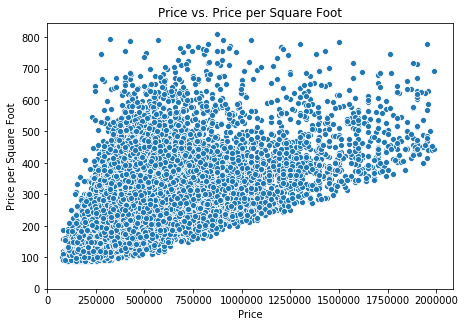

In [157]:
plt.figure(figsize=(16,24))
plt.subplots_adjust(hspace=0.3)
plt.subplot(421)
ax = sns.scatterplot(x='price', y='price_per_sqft', data=kc)
plt.xlim(0,None)
plt.ylim(0,None)
plt.title('Price vs. Price per Square Foot')
plt.xlabel('Price')
plt.ylabel('Price per Square Foot')

The average price per square foot is $183. The plot above shows an expected correlation, as the price of the home increases, so does the price per square foot. There are a few outliers. Which could be an indication that the homes are over priced.

## Feature Scaling and Normalization
We want to take some time to normalize our features so we can obtain better results!First we will plot histograms of our features to determine if they are continuous or categorical and to check see how they are distributed.

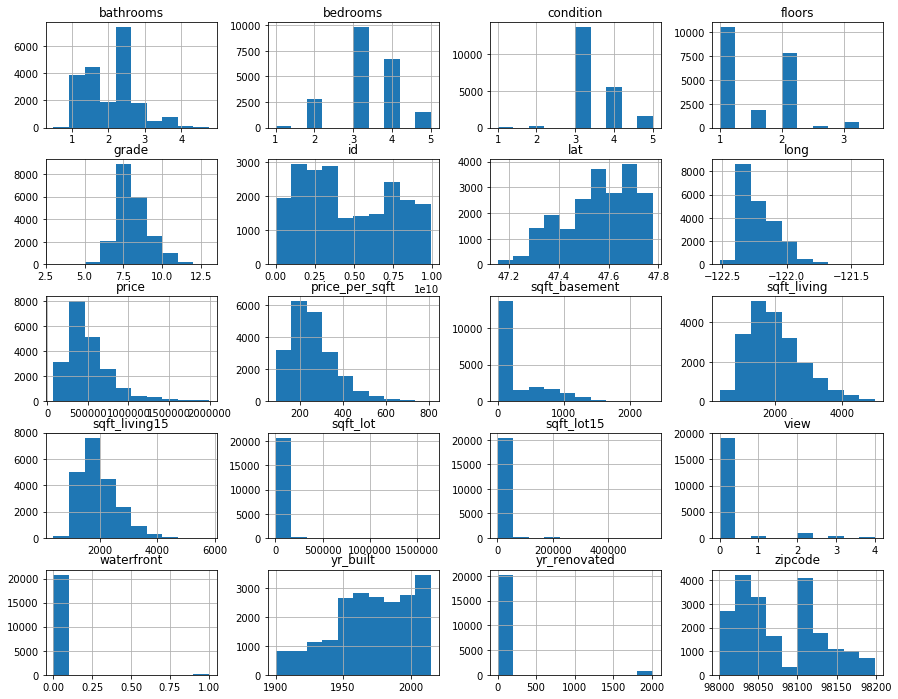

In [158]:
kc.hist(figsize=[15,12])
plt.show()

Let's normalize the following continous variables with a log transformation:
- sqft_living
- sqft_living15
- sqft_lot
- sqft_lot15

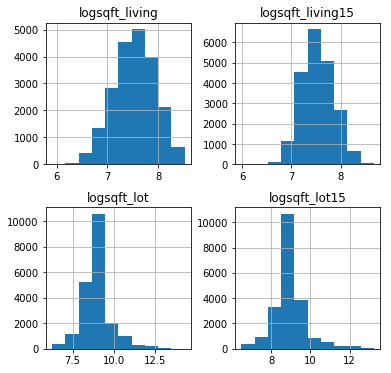

In [159]:
kc_log = pd.DataFrame([])
kc_log['logsqft_living'] = np.log(kc_pred['sqft_living'])
kc_log['logsqft_living15'] = np.log(kc_pred['sqft_living15'])
kc_log['logsqft_lot'] = np.log(kc_pred['sqft_lot'])
kc_log['logsqft_lot15'] = np.log(kc_pred['sqft_lot15'])
kc_log.hist(figsize = [6,6]);

The new variables have improved, but are not perfect. Let's see if we can improve some more by rescaling them. We can do this by applying a standardization on logsqft_living and logsqft_living15 to adjust the mean. On logsqft_lot and logsqft_lot15 we will perform mean normalization.

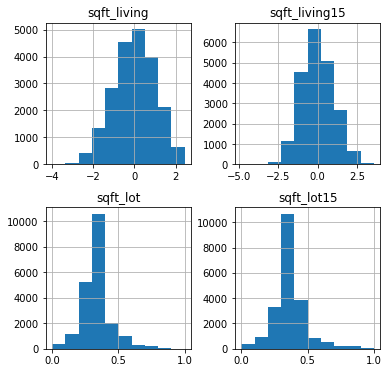

In [160]:
logsqft_living =  kc_log['logsqft_living']
logsqft_living15 =  kc_log['logsqft_living15']
logsqft_lot =  kc_log['logsqft_lot']
logsqft_lot15 =  kc_log['logsqft_lot15']

scaled_sqft_living = (logsqft_living-np.mean(logsqft_living))/np.sqrt(np.var(logsqft_living))
scaled_sqft_living15 = (logsqft_living15-np.mean(logsqft_living15))/np.sqrt(np.var(logsqft_living15))
scaled_sqft_lot = (logsqft_lot-min(logsqft_lot))/(max(logsqft_lot)-min(logsqft_lot))
scaled_sqft_lot15 = (logsqft_lot15-min(logsqft_lot15))/(max(logsqft_lot15)-min(logsqft_lot15))
                                                                  
kc_cont_scaled = pd.DataFrame([])
kc_cont_scaled['sqft_living'] = scaled_sqft_living
kc_cont_scaled['sqft_living15'] = scaled_sqft_living15
kc_cont_scaled['sqft_lot'] = scaled_sqft_lot
kc_cont_scaled['sqft_lot15'] = scaled_sqft_lot15                                                                 


kc_cont_scaled.hist(figsize = [6,6]);


Now, let's change some of our categorical variables to a category variable.

In [161]:
kc['sqft_basement'] = kc.sqft_basement.astype('category') 
kc['waterfront'] = kc.waterfront.astype('category') 
kc['view'] = kc.view.astype('category') 
kc['bedrooms'] = kc.bedrooms.astype('category')
kc['bathrooms'] = kc.bathrooms.astype('category')
kc['floors'] = kc.floors.astype('category')
kc['grade'] = kc.grade.astype('category')
kc['zipcode'] = kc.zipcode.astype('category')
kc['date'] = kc.date.astype('category')

In [162]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20956 entries, 0 to 21596
Data columns (total 21 columns):
id                20956 non-null int64
date              20956 non-null category
price             20956 non-null float64
bedrooms          20956 non-null category
bathrooms         20956 non-null category
sqft_living       20956 non-null int64
sqft_lot          20956 non-null int64
floors            20956 non-null category
waterfront        20956 non-null category
view              20956 non-null category
condition         20956 non-null int64
grade             20956 non-null category
sqft_basement     20956 non-null category
yr_built          20956 non-null int64
yr_renovated      20956 non-null float64
zipcode           20956 non-null category
lat               20956 non-null float64
long              20956 non-null float64
sqft_living15     20956 non-null int64
sqft_lot15        20956 non-null int64
price_per_sqft    20956 non-null float64
dtypes: category(9), float64(5), in

# Modeling

In [163]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

outcome = 'price'
predictors = kc.drop('price', axis =1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

model = ols(formula = formula, data = kc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     377.6
Date:                Sun, 06 Oct 2019   Prob (F-statistic):               0.00
Time:                        12:09:02   Log-Likelihood:            -2.6379e+05
No. Observations:               20956   AIC:                         5.291e+05
Df Residuals:                   20197   BIC:                         5.351e+05
Df Model:                         758                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                 1.333e+06   2.86e+06      0.466      0.641   -4.27e+06    6.94e+06
date[T.Timestamp('2014-05-03 00:00:00')] -2.365e+04   3.73e+04     -0.633      0.526   -9.68e+04    4.95e+04
date[T.Timestamp('2014-05-04 00:00:00')]   565.7237   3.39e+04      0.017      0.987   -6.58e+04    6.69e+04
date[T.Timestamp('2014-05-05 00:00:00')]  3049.5780   1.21e+04      0.253      0.800   -2.06e+04    2.67e+04
date[T.Timestamp('2014-05-06 00:00:00')]  3233.6400   1.21e+04      0.268      0.788   -2.04e+04    2.69e+04
date[T.Timestamp('2014-05-07 00:00:00')]  -959.5767   1.18e+04     -0.081      0.935   -2.41e+04    2.22e+04
date[T.Timestamp('2014-05-08 00:00:00')]  1.113e+04   1.22e+04      0.915      0.360   -1.27e+04     3.5e+04
date[T.Timestamp('2014-05-09 00:00:00')] -1620.7484   1.22e+04     -0.133      0.894   -2.55e+04    2.23e+04
date[T.Timestamp('2014-05-10 00:00:00')]  1.608e+04   3.41e+04      0.471      0.637   -5.08e+04    8.29e+04
date[T.Timestamp('2014-05-11 00:00:00')]    1.5e+04   5.22e+04      0.287      0.774   -8.74e+04    1.17e+05
date[T.Timestamp('2014-05-12 00:00:00')]   1.48e+04   1.21e+04      1.220      0.223   -8979.830    3.86e+04
date[T.Timestamp('2014-05-13 00:00:00')]  3849.9140   1.21e+04      0.318      0.751   -1.99e+04    2.76e+04
date[T.Timestamp('2014-05-14 00:00:00')]  1.011e+04   1.21e+04      0.837      0.403   -1.36e+04    3.38e+04
date[T.Timestamp('2014-05-15 00:00:00')] -2020.8297   1.21e+04     -0.167      0.867   -2.57e+04    2.17e+04
date[T.Timestamp('2014-05-16 00:00:00')] -2520.8553   1.24e+04     -0.203      0.839   -2.68e+04    2.18e+04
date[T.Timestamp('2014-05-17 00:00:00')]   -3.7e+04   7.36e+04     -0.503      0.615   -1.81e+05    1.07e+05
date[T.Timestamp('2014-05-18 00:00:00')]  5800.9891   2.89e+04      0.201      0.841   -5.08e+04    6.24e+04
date[T.Timestamp('2014-05-19 00:00:00')]  1.428e+04   1.21e+04      1.185      0.236   -9344.559    3.79e+04
date[T.Timestamp('2014-05-20 00:00:00')]  8715.1722   1.13e+04      0.772      0.440   -1.34e+04    3.09e+04
date[T.Timestamp('2014-05-21 00:00:00')]  5699.1317   1.18e+04      0.483      0.629   -1.74e+04    2.88e+04
date[T.Timestamp('2014-05-22 00:00:00')] -1.068e+04   1.18e+04     -0.902      0.367   -3.39e+04    1.25e+04
date[T.Timestamp('2014-05-23 00:00:00')] -7091.8091    1.2e+04     -0.592      0.554   -3.06e+04    1.64e+04
date[T.Timestamp('2014-05-24 00:00:00')] -7318.4299   2.57e+04     -0.284      0.776   -5.77e+04    4.31e+04
date[T.Timestamp('2014-05-25 00:00:00')]  -3.61e+04   3.38e+04     -1.068      0.285   -1.02e+05    3.01e+04
date[T.Timestamp('2014-05-26 00:00:00')]  3.743e+04   2.72e+04      1.378      0.168   -1.58e+04    9.07e+04
date[T.Timestamp('2014-05-27 00

Next we will we use train-test-split to validate the model.

In [164]:
from sklearn.model_selection import train_test_split

X = kc.drop(['price'], axis=1)
y = pd.DataFrame(kc.price, columns = ['price'])

X_train, X_test, y_train, y_test = train_test_split(X,y)
print(len(X_train,), len(X_test), len(y_train), len(y_test)) # Preview of train-test-split

15717 5239 15717 5239


In [165]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

from sklearn.metrics import mean_squared_error

In [166]:
linreg.fit(X_train, y_train) # Fitting the model to the train

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [167]:
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test) # Calculating predictions on the train and test sets

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test # Calculating residuals

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 7291450756.358826
Test Mean Squarred Error: 7375798839.909801


Our results are looking pretty good. We got an R-squared value of .934, telling us that about 93% of variance can be explained by our model. We can see that there isn't a big difference between the test and training set, which indicates that we didn't over fit our model.

Use feature ranking the most important features in our data set. 

In [168]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

selector = selector.fit(predictors, kc['price'])

# unscaled data
no_scale = selector.ranking_


In [169]:
# Scale all variables to value between 0-1 to use RFE to determine which features are the most important for determining price?
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# ONLY SCALE NON-CATEGORICAL, ONE-HOT CATEGORICAL
scaler.fit(predictors, kc['price'])
scaled_data = scaler.transform(predictors)
scaled_data.shape

(20956, 20)

In [170]:
# Running RFE with scaled data
selector = selector.fit(scaled_data, kc['price']) 
scaled = selector.ranking_

In [171]:
best_features = pd.DataFrame({'columns':predictors.columns, 'scaled_rank' : scaled,'unscaled_rank':no_scale})
best_features.set_index('columns',inplace=True)

best_features.sort_values('unscaled_rank')

,scaled_rank,unscaled_rank
columns,,
condition,5,1
lat,10,1
waterfront,1,1
view,4,1
grade,1,1
long,14,2
bathrooms,2,3
bedrooms,6,4
floors,12,5


Now, lets use seleted features to see if we can create a better fit model. Waterfront, grade, price_per_sqft, sqft_living, sqft_lot, bathrooms, yr_built, view, condition.

There are other aspects of the data I would like to explore to see if a better fit could be determined. Such as removing some more outliers. I would also like to look at the relationship of bathrooms to bedrooms in a house. A four bedroom house could sound more appealing than a three bedroom, but is a 4 bed/1 bath house more appealing than a 3 bed/2 bath? Possibly not, causing a homeowner to have to lower their price to sell their home. This is an idea I would like to explore further in the future.

In [172]:
# Pull out the 9 best features via ranking 
best_num_feat = 9
selected_features = best_features.sort_values('unscaled_rank')[0:best_num_feat]
selected_features

,scaled_rank,unscaled_rank
columns,,
condition,5,1
lat,10,1
waterfront,1,1
view,4,1
grade,1,1
long,14,2
bathrooms,2,3
bedrooms,6,4
floors,12,5


In [173]:
selected_best = ['waterfront', 'grade', 'price_per_sqft', 'sqft_living', 'sqft_lot', 'bathrooms', 'yr_built', 'view',
                 'condition']

In [174]:
X = kc[selected_best]
Y =kc['price']

In [175]:
kc_data =pd.concat([Y,X], axis = 1)
formula_two = 'price ~ waterfront + grade +  price_per_sqft + sqft_living + sqft_lot + bathrooms + yr_built + view + condition'

import statsmodels.formula.api as smf

model = smf.ols(formula = formula_two, data = kc_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     6031.
Date:                Sun, 06 Oct 2019   Prob (F-statistic):               0.00
Time:                        12:10:16   Log-Likelihood:            -2.6654e+05
No. Observations:               20956   AIC:                         5.332e+05
Df Residuals:                   20918   BIC:                         5.335e+05
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5.346e+04   1.07e+05     -0.500      0.617   -2.63e+05    1.56e+05
waterfront[T.1.0]  4.769e+04   9752.249      4.890      0.000    2.86e+04    6.68e+04
grade[T.4]         1.728e+05   8.26e+04      2.093      0.036     1.1e+04    3.35e+05
grade[T.5]         2.098e+05   8.17e+04      2.570      0.010    4.98e+04     3.7e+05
grade[T.6]         2.218e+05   8.16e+04      2.719      0.007    6.19e+04    3.82e+05
grade[T.7]          2.26e+05   8.16e+04      2.771      0.006    6.61e+04    3.86e+05
grade[T.8]         2.344e+05   8.16e+04      2.873      0.004    7.45e+04    3.94e+05
grade[T.9]         2.712e+05   8.16e+04      3.323      0.001    1.11e+05    4.31e+05
grade[T.10]         3.21e+05   8.17e+04      3.931      0.000    1.61e+05    4.81e+05
grade[T.11]        3.834e+05   8.18e+04      4.687      0.000    2.23e+05    5.44e+05
grade[T.12]        5.152e+05   8.28e+04      6.219      0.000    3.53e+05    6.78e+05
grade[T.13]        6.558e+05   1.15e+05      5.700      0.000     4.3e+05    8.81e+05
bathrooms[T.0.75] -1.078e+05   4.17e+04     -2.585      0.010    -1.9e+05   -2.61e+04
bathrooms[T.1.0]  -4.272e+04   4.05e+04     -1.055      0.291   -1.22e+05    3.66e+04
bathrooms[T.1.25] -5.507e+04   4.87e+04     -1.131      0.258    -1.5e+05    4.03e+04
bathrooms[T.1.5]  -8042.5739   4.05e+04     -0.198      0.843   -8.75e+04    7.14e+04
bathrooms[T.1.75] -1982.0844   4.05e+04     -0.049      0.961   -8.14e+04    7.74e+04
bathrooms[T.2.0]    271.5610   4.05e+04      0.007      0.995   -7.92e+04    7.97e+04
bathrooms[T.2.25]  9224.9150   4.05e+04      0.228      0.820   -7.03e+04    8.87e+04
bathrooms[T.2.5]  -5448.8982   4.05e+04     -0.134      0.893   -8.49e+04     7.4e+04
bathrooms[T.2.75] -2550.4924   4.06e+04     -0.063      0.950   -8.21e+04     7.7e+04
bathrooms[T.3.0]    878.9098   4.06e+04      0.022      0.983   -7.88e+04    8.05e+04
bathrooms[T.3.25]   1.82e+04   4.07e+04      0.447      0.655   -6.16e+04     9.8e+04
bathrooms[T.3.5]   4604.2806   4.07e+04      0.113      0.910   -7.51e+04    8.43e+04
bathrooms[T.3.75]  6.753e+04   4.13e+04      1.637      0.102   -1.34e+04    1.48e+05
bathrooms[T.4.0]   2.191e+04   4.15e+04      0.528      0.597   -5.94e+04    1.03e+05
bathrooms[T.4.25]  1.595e+04   4.25e+04      0.376      0.707   -6.73e+04    9.92e+04
bathrooms[T.4.5]   1.008e+04   4.23e+04      0.238      0.812   -7.28e+04     9.3e+04
bathrooms[T.4.75]  2.684e+04   5.45e+04      0.493      0.622   -7.99e+04    1.34e+05
view[T.1.0]        2.079e+04   4695.889      4.428      0.000    1.16e+04       3e+04
view[T.2.0]        1.242e+04   2846.180      4.363      0.000    6838.002     1.8e+04
view[T.3.0]        4.417e+04   3953.098     11.174      0.000    3.64e+04    5.19e+04
view[T.4.0]        8.713e+04   6385.846     13.644      0.000    7.46e+04

There are other aspects of the data I would like to explore to see if a better fit could be determined. Such as removing some more outliers. I would also like to look at the relationship of bathrooms to bedrooms in a house. A four bedroom house could sound more appealing than a three bedroom, but is a 4 bed/1 bath house more appealing than a 3 bed/2 bath? Possibly not, causing a homeowner to have to lower their price to sell their home. This is an idea I would like to explore further in the future.